# Uber_Rides_Data_Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
df.shape

(1156, 7)

In [10]:
df['PURPOSE'].fillna("NOT", inplace=True)

C:\Users\rushi\AppData\Local\Temp\ipykernel_11816\1469337574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [13]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],
									errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],
									errors='coerce')

In [15]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

In [16]:
df.dropna(inplace=True)

In [17]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


In [20]:
unique_values = df.select_dtypes(include='object').nunique()


In [21]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175')])

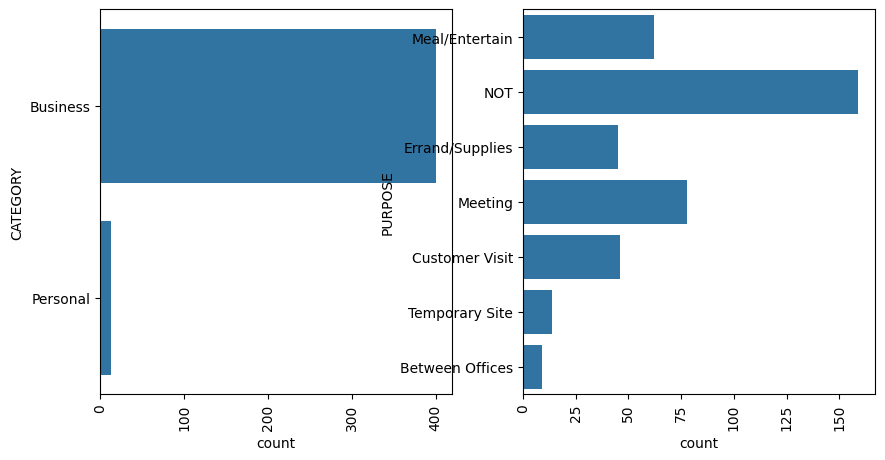

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df['PURPOSE'])
plt.xticks(rotation=90)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

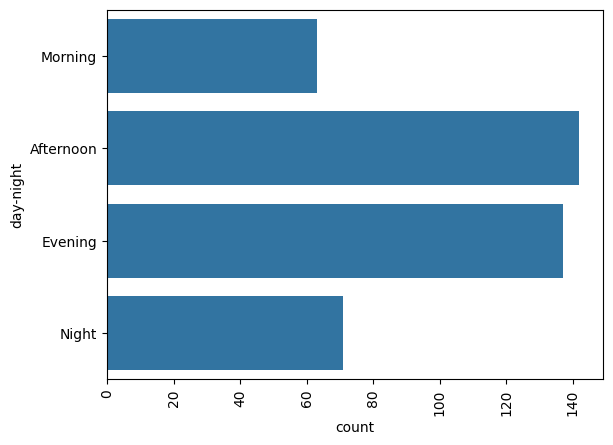

In [23]:
sns.countplot(df['day-night'])
plt.xticks(rotation=90)

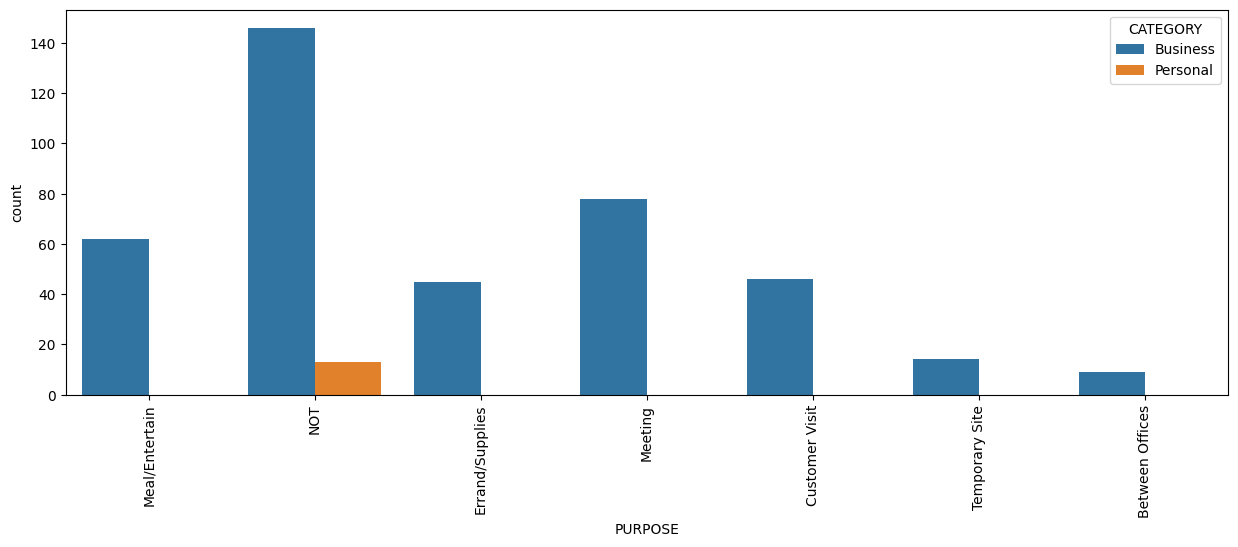

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

<Axes: >

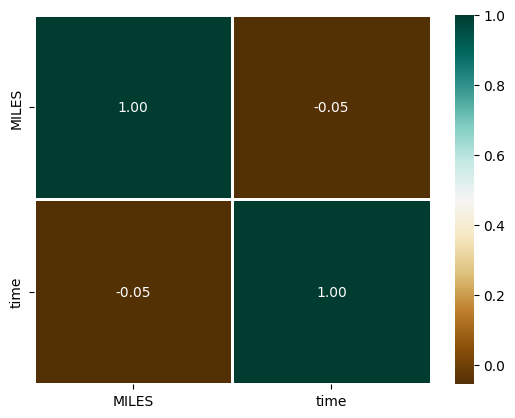

In [25]:
numeric_dataset = df.select_dtypes(include=['number'])

# Now you can create the heatmap
sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<Axes: xlabel='MILES'>

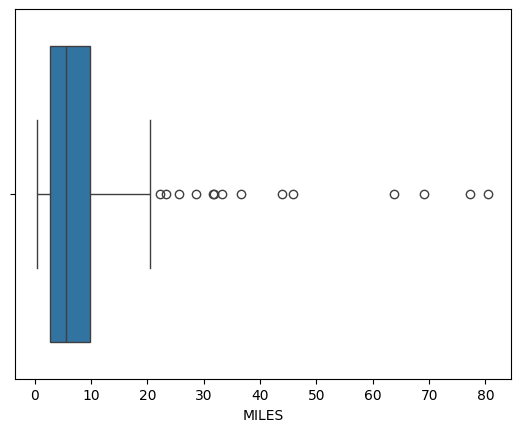

In [31]:
sns.boxplot(x=df[df['MILES'] < 100]['MILES'])

In [32]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

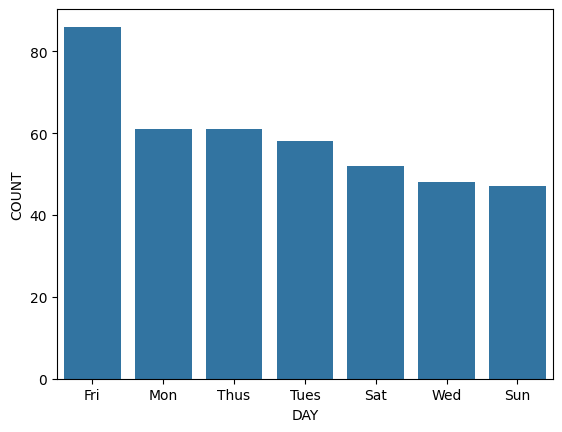

In [34]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

C:\Users\rushi\AppData\Local\Temp\ipykernel_11816\1171915261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

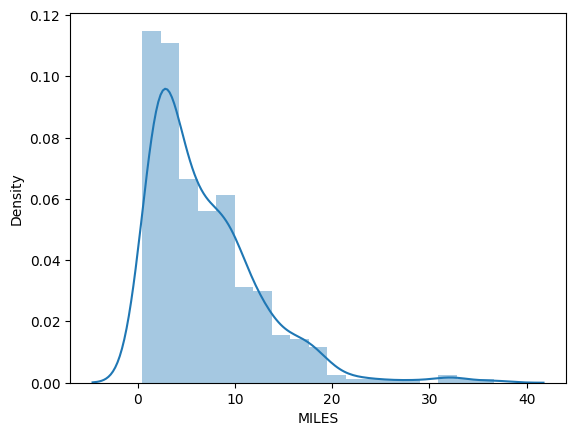

In [35]:
sns.distplot(df[df['MILES']<40]['MILES'])

In [36]:
long_rides = df[df['MILES'] > 10]
print(long_rides.head())

            START_DATE            END_DATE  CATEGORY        START  \
4  2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   
9  2016-01-10 12:17:00 2016-01-10 12:44:00  Business      Jamaica   
10 2016-01-10 15:08:00 2016-01-10 15:51:00  Business     New York   
22 2016-01-12 16:02:00 2016-01-12 17:00:00  Business     New York   
61 2016-02-01 10:35:00 2016-02-01 11:15:00  Business         Cary   

               STOP  MILES         PURPOSE        date  time  day-night   DAY  
4   West Palm Beach   63.7  Customer Visit  2016-01-06  14.0  Afternoon   Wed  
9          New York   16.5  Customer Visit  2016-01-10  12.0  Afternoon   Sun  
10           Queens   10.8         Meeting  2016-01-10  15.0  Afternoon   Sun  
22    Queens County   15.1         Meeting  2016-01-12  16.0    Evening  Tues  
61      Chapel Hill   19.4  Customer Visit  2016-02-01  10.0    Morning   Mon  


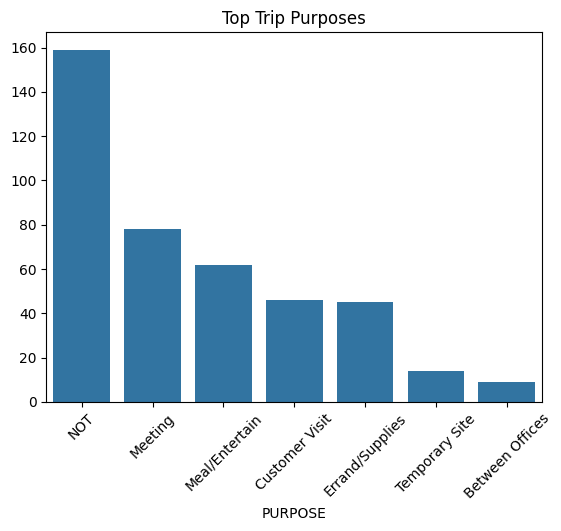

In [44]:
purpose = df["PURPOSE"].value_counts().head(10)
sns.barplot(x=purpose.index, y=purpose.values)
plt.xticks(rotation=45)
plt.title("Top Trip Purposes")
plt.show()


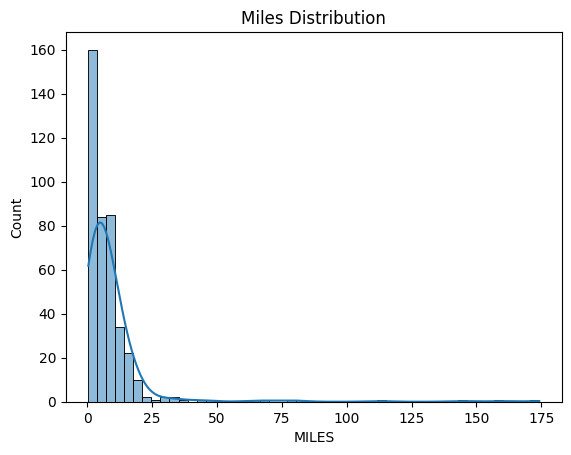

In [45]:
sns.histplot(df["MILES"], bins=50, kde=True)
plt.title("Miles Distribution")
plt.show()

In [47]:
# Night definition: 20:00 (8 PM) to 5:00 (5 AM)
df["Hour"] = pd.to_datetime(df["START_DATE"]).dt.hour

night_trips = df[(df["Hour"] >= 20) | (df["Hour"] <= 5)]

print("Total Night Trips:", len(night_trips))


Total Night Trips: 77


In [48]:
base_fare = 2
per_mile = 1.5
per_minute = 0.25

df["Duration_Min"] = (df["END_DATE"] - df["START_DATE"]).dt.total_seconds() / 60

# Fare calculation formula
df["Estimated_Fare"] = base_fare + (df["MILES"] * per_mile) + (df["Duration_Min"] * per_minute)

# Show first 10 rides with fare
print(df[["MILES", "Duration_Min", "Estimated_Fare"]].head(10))

   MILES  Duration_Min  Estimated_Fare
0    5.1           6.0           11.15
1    5.0          12.0           12.50
2    4.8          13.0           12.45
3    4.7          14.0           12.55
4   63.7          67.0          114.30
5    4.3           4.0            9.45
6    7.1           5.0           13.90
7    0.8           6.0            4.70
8    8.3          20.0           19.45
9   16.5          27.0           33.50


In [49]:
# Purpose-wise trip count
purpose_count = df["PURPOSE"].value_counts()

# Show all purposes with trip count
print(purpose_count)

# If only top 15 purposes
print(purpose_count.head(10))


PURPOSE
NOT                159
Meeting             78
Meal/Entertain      62
Customer Visit      46
Errand/Supplies     45
Temporary Site      14
Between Offices      9
Name: count, dtype: int64
PURPOSE
NOT                159
Meeting             78
Meal/Entertain      62
Customer Visit      46
Errand/Supplies     45
Temporary Site      14
Between Offices      9
Name: count, dtype: int64


   CATEGORY  Passengers
0  Business           2
1  Business           2
2  Business           2
3  Business           2
4  Business           2
5  Business           2
6  Business           2
7  Business           2
8  Business           2
9  Business           2


C:\Users\rushi\AppData\Local\Temp\ipykernel_11816\2909652352.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Passengers", data=df, palette="coolwarm")


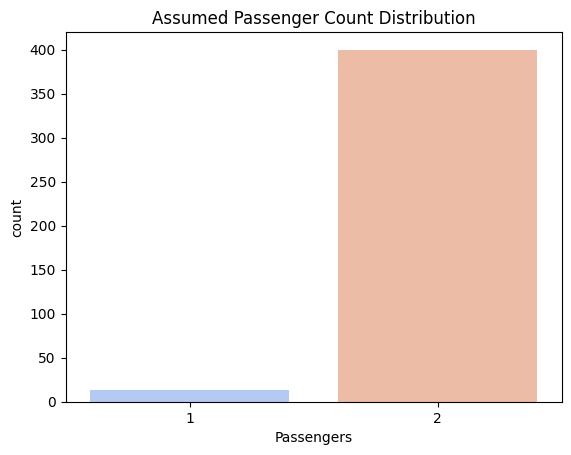

In [50]:
# Add a new column "Passengers" based on CATEGORY
df["Passengers"] = df["CATEGORY"].apply(lambda x: 2 if x == "Business" else 1)

# Check first 10 rows
print(df[["CATEGORY", "Passengers"]].head(10))

sns.countplot(x="Passengers", data=df, palette="coolwarm")
plt.title("Assumed Passenger Count Distribution")
plt.show()


    CATEGORY  Passengers
0   Business           1
1   Business           3
2   Business           3
3   Business           2
4   Business           3
5   Business           2
6   Business           1
7   Business           2
8   Business           2
9   Business           1
10  Business           2
11  Business           1
12  Business           2
13  Business           1
14  Business           2
15  Business           2
16  Business           1
17  Business           2
18  Business           3
19  Business           3
20  Business           2
21  Business           2
22  Business           2
61  Business           2
62  Business           2
63  Business           2
64  Business           2
65  Business           2
66  Business           3
67  Business           2
68  Business           3
69  Business           1
70  Business           3
71  Business           1
72  Business           3
73  Business           1
74  Business           3
75  Business           3
76  Business           1


C:\Users\rushi\AppData\Local\Temp\ipykernel_11816\1861002937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Passengers", data=df, palette="mako")


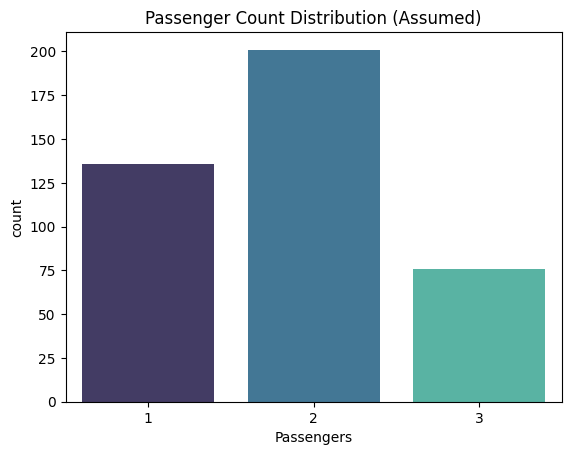

In [51]:
import numpy as np

# Function to assign passengers with variety
def assign_passengers(category):
    if category == "Business":
        return np.random.choice([1,2,3], p=[0.3,0.5,0.2])  # more chance of 2
    else:  # Personal
        return np.random.choice([1,2], p=[0.8,0.2])  # mostly 1

# Add Passengers column
df["Passengers"] = df["CATEGORY"].apply(assign_passengers)

# Show first 50 rows
print(df[["CATEGORY", "Passengers"]].head(50))


sns.countplot(x="Passengers", data=df, palette="mako")
plt.title("Passenger Count Distribution (Assumed)")
plt.show()


   CATEGORY  Passengers
0  Business           2
1  Business           2
2  Business           2
3  Business           2
4  Business           2


C:\Users\rushi\AppData\Local\Temp\ipykernel_11816\1749826440.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Passengers", data=df, palette="Set2")


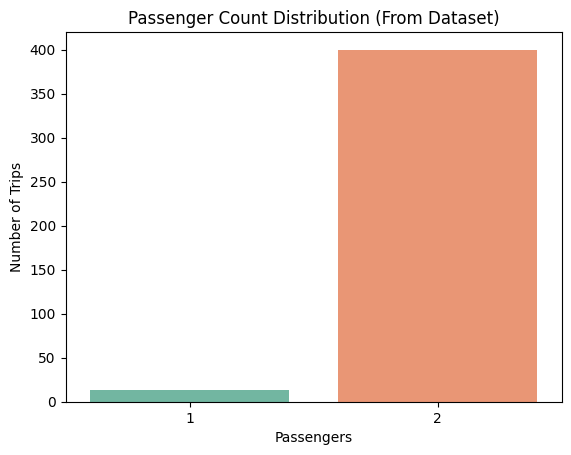

In [56]:
# Empty list to store passengers
passenger_list = []

# Loop over each row in CATEGORY column
for cat in df["CATEGORY"]:
    if cat == "Business":
        passenger_list.append(2)   # assume 2 for Business
    else:
        passenger_list.append(1)   # assume 1 for Personal

# Add to DataFrame
df["Passengers"] = passenger_list

# Show first 5 rows
print(df[["CATEGORY", "Passengers"]].head(5))

sns.countplot(x="Passengers", data=df, palette="Set2")
plt.title("Passenger Count Distribution (From Dataset)")
plt.xlabel("Passengers")
plt.ylabel("Number of Trips")
plt.show()

In [ ]:
### 🚖 Thank You for Viewing Uber Rides Data Analysis 🚖